# Cifar - from keras examples

In [1]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train = np.swapaxes(X_train,1,3)
X_train = np.swapaxes(X_train,1,2)

X_test = np.swapaxes(X_test,1,3)
X_test = np.swapaxes(X_test,1,2)

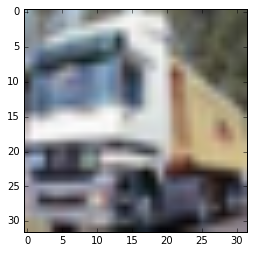

In [4]:
plt.imshow(X_train[1])

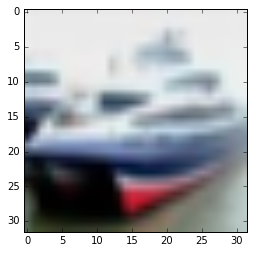

In [5]:
plt.imshow(X_test[1])

In [6]:
# exercise - implement convnet on Cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

In [7]:
import tensorflow as tf
tf.python.control_flow_ops = tf

In [8]:
img_rows, img_cols = 32, 32
nb_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)

In [9]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [10]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, 
          nb_epoch=10,verbose=1,
          validation_data=(X_test, Y_test))


#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 768s - loss: 1.6815 - acc: 0.3869 - val_loss: 1.4051 - val_acc: 0.5143
Epoch 2/10
50000/50000 [==============================] - 748s - loss: 1.2654 - acc: 0.5528 - val_loss: 1.1023 - val_acc: 0.6099
Epoch 3/10
50000/50000 [==============================] - 800s - loss: 1.1194 - acc: 0.6090 - val_loss: 1.0468 - val_acc: 0.6379
Epoch 4/10
50000/50000 [==============================] - 827s - loss: 1.0441 - acc: 0.6392 - val_loss: 1.0288 - val_acc: 0.6467
Epoch 5/10
50000/50000 [==============================] - 633s - loss: 1.0002 - acc: 0.6575 - val_loss: 1.1412 - val_acc: 0.6460
Epoch 6/10
50000/50000 [==============================] - 612s - loss: 0.9884 - acc: 0.6639 - val_loss: 0.9231 - val_acc: 0.6864
Epoch 7/10
50000/50000 [==============================] - 532s - loss: 0.9937 - acc: 0.6643 - val_loss: 0.9688 - val_acc: 0.6753
Epoch 8/10
50000/50000 [=======================

In [11]:
#NOW with data augmentation

In [12]:
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(X_train, Y_train,
                    batch_size=32),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=10,
                    validation_data=(X_test, Y_test))

Using real-time data augmentation.
Epoch 1/10
50000/50000 [==============================] - 643s - loss: 1.7485 - acc: 0.3560 - val_loss: 1.6980 - val_acc: 0.4109
Epoch 2/10
50000/50000 [==============================] - 549s - loss: 1.3565 - acc: 0.5125 - val_loss: 1.2525 - val_acc: 0.5505
Epoch 3/10
50000/50000 [==============================] - 527s - loss: 1.2353 - acc: 0.5624 - val_loss: 1.0141 - val_acc: 0.6426
Epoch 4/10
50000/50000 [==============================] - 520s - loss: 1.1758 - acc: 0.5870 - val_loss: 1.0550 - val_acc: 0.6265
Epoch 5/10
50000/50000 [==============================] - 487s - loss: 1.1491 - acc: 0.6001 - val_loss: 0.9511 - val_acc: 0.6677
Epoch 6/10
50000/50000 [==============================] - 527s - loss: 1.1312 - acc: 0.6085 - val_loss: 0.9924 - val_acc: 0.6558
Epoch 7/10
50000/50000 [==============================] - 532s - loss: 1.1231 - acc: 0.6150 - val_loss: 0.9576 - val_acc: 0.6645
Epoch 8/10
50000/50000 [==============================] - 572s